In [0]:
import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation



Using TensorFlow backend.


In [0]:
fashion_mnist=keras.datasets.fashion_mnist

(tr_image,tr_label),(te_image,te_label)=fashion_mnist.load_data()

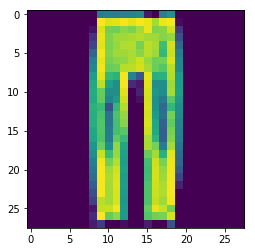

In [0]:
plt.imshow(tr_image[43212])

In [0]:
tr_image.shape

(60000, 28, 28)

In [0]:
label_name=['Top','Pants','Pullover','Dress','Coat','Sandle','Shirt','Sneaker','Bag','Shose']

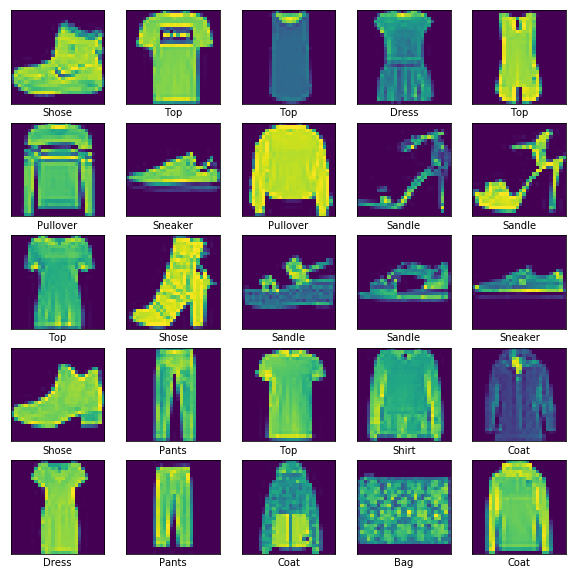

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  
  plt.imshow(tr_image[i])
  plt.xlabel(label_name[tr_label[i]])
  
plt.show()

In [0]:
## question : 최소 loss구하기가 왜 yes or no로 나뉘는지..
## 최소 loss가 fix된 것이 아니라면 순차적으로 처리할때 이전보다 작은 게 나오면 최소가 아닌가
## 편미분을 통해 구하면 

## 출력층의 dimension을 변경이 가능할까?
## 예를들어 11개면 0000000011을 설정해서 lable naming하면 되지 않을까

## 전처리!!
## 숫자가 가지는 의미는 무엇인가 --> 알아보기

tr_image=tr_image.reshape(60000,784).astype('float32')/255.0 ## 255 로 나누는 이유는 정규화의 개념
te_image=te_image.reshape(10000,784).astype('float32')/255.0



In [0]:
tr_label=np_utils.to_categorical(tr_label)
te_label=np_utils.to_categorical(te_label)

In [0]:
val_img = tr_image[50000:]
val_lbl = tr_label[50000:]
tr_img  = tr_image[:50000]
tr_lbl  = tr_label[:50000]


In [0]:
tr_rand=np.random.choice(50000,700)
val_rand=np.random.choice(10000,300)

tr_img=tr_img[tr_rand]
tr_lbl=tr_lbl[tr_rand]

val_img=val_img[val_rand]
val_lbl=val_lbl[val_rand]



## 모델구성

In [0]:
## Dense의 arg가 뭐가 있는지 정확히 알아보자
model=Sequential()
model.add(Dense(units=64,input_dim=28*28,activation='relu')) ## activation : sigmoid, tanh, relu
model.add(Dense(64,activation='relu')) ## Dense의 unit는 output의 개수를 설정
model.add(Dense(units=10,activation='softmax'))

## 학습과정 설정

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
## optimizer 는 learning rate와 미분을 통해 최적의 가중치를 찾는 방법// 여기서는 stochastic gradient descent

## 모델학습

In [0]:
hist=model.fit(tr_img,tr_lbl,epochs=100,batch_size=32,validation_data=(val_img,val_lbl))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 299us/step - loss: 2.2260 - acc: 0.2357 - val_loss: 2.1039 - val_acc: 0.3500
Epoch 2/100
700/700 [==============================] - 0s 61us/step - loss: 2.0362 - acc: 0.3943 - val_loss: 1.9629 - val_acc: 0.3967
Epoch 3/100
700/700 [==============================] - 0s 60us/step - loss: 1.8888 - acc: 0.4700 - val_loss: 1.8255 - val_acc: 0.4367
Epoch 4/100
700/700 [==============================] - 0s 70us/step - loss: 1.7450 - acc: 0.5357 - val_loss: 1.6969 - val_acc: 0.5000
Epoch 5/100
700/700 [==============================] - 0s 72us/step - loss: 1.6056 - acc: 0.5686 - val_loss: 1.5692 - val_acc: 0.5200
Epoch 6/100
700/700 [==============================] - 0s 66us/step - loss: 1.4773 - acc: 0.5957 - val_loss: 1.4436 - val_acc: 0.6100
Epoch 7/100
700/700 [==============================] -

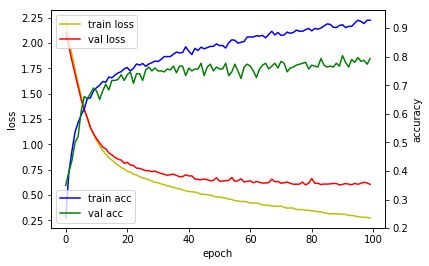

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig,loss_ax=plt.subplots()

acc_ax=loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['acc'],'b',label='train acc')
acc_ax.plot(hist.history['val_acc'],'g',label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [0]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[2.2259577655792238, 2.036182289123535, 1.888776455606733, 1.7449786336081368, 1.6055526222501482, 1.4773011221204486, 1.3599279403686524, 1.2600045715059554, 1.1716382721492222, 1.099899661200387, 1.0394964279447283, 0.9867130885805403, 0.9402676068033491, 0.9050237693105425, 0.8692126546587263, 0.8447356462478638, 0.8174206955092294, 0.7956291563170297, 0.7724318368094308, 0.7572557371003287, 0.7328409239224025, 0.7265618051801409, 0.7058548559461321, 0.6976129741328103, 0.6813217554773603, 0.6688274472100394, 0.6619170641899109, 0.6492399644851684, 0.6388487706865583, 0.6234343869345529, 0.622354976790292, 0.609627627304622, 0.6015102750914437, 0.5912457350322179, 0.5831262268338885, 0.5773741820880345, 0.5663512696538653, 0.5615239335809435, 0.5510079274858747, 0.5415268799236842, 0.5348021914277757, 0.5316109636851719, 0.5287472176551818, 0.520214410679681, 0.5089153061594281, 0.5062349597045354, 0.5027841716153281, 0.4988628169468471, 0.490570016247885

In [0]:
len(hist.history['loss'])

100

# model evaluate

In [0]:
loss_and_acc = model.evaluate(te_image, te_label, batch_size=32)
print('## evaluation  ##')
print(loss_and_acc)

10000/10000 [==============================] - 0s 22us/step
## evaluation  ##
[0.6258853548526764, 0.7888]


In [0]:
xhat = te_image
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[1.91078943e-04 3.19062997e-06 1.26066821e-04 ... 2.96145797e-01
  9.95547045e-03 6.03021264e-01]
 [2.08713952e-03 1.20303923e-07 9.59291697e-01 ... 1.78355481e-08
  2.91728775e-05 8.09599953e-07]
 [1.91684899e-06 9.99602735e-01 1.57913303e-06 ... 9.95002525e-10
  6.29173229e-08 1.50780544e-08]
 ...
 [5.01598977e-02 1.56017210e-04 2.26869644e-03 ... 1.29027490e-03
  7.08755076e-01 1.31205446e-03]
 [1.17570735e-05 9.94483531e-01 5.95876827e-06 ... 9.24238464e-08
  6.37518497e-07 1.34953325e-05]
 [1.69726321e-03 1.59892938e-04 3.96636128e-03 ... 5.01098037e-01
  5.10361083e-02 4.02658768e-02]]


In [0]:
te_image.shape

(10000, 784)

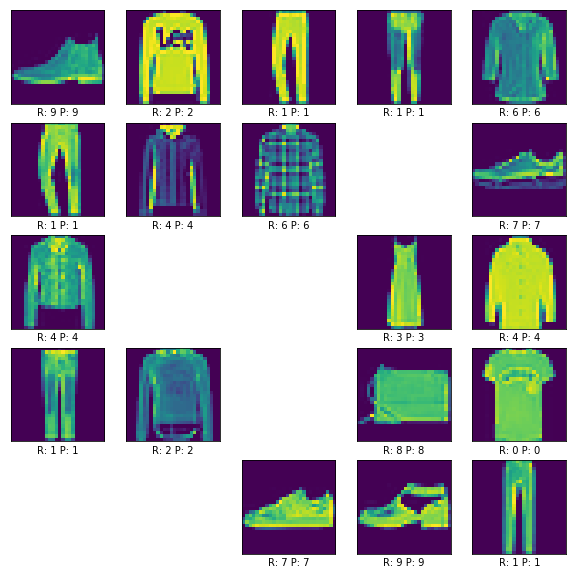

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(te_image[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()

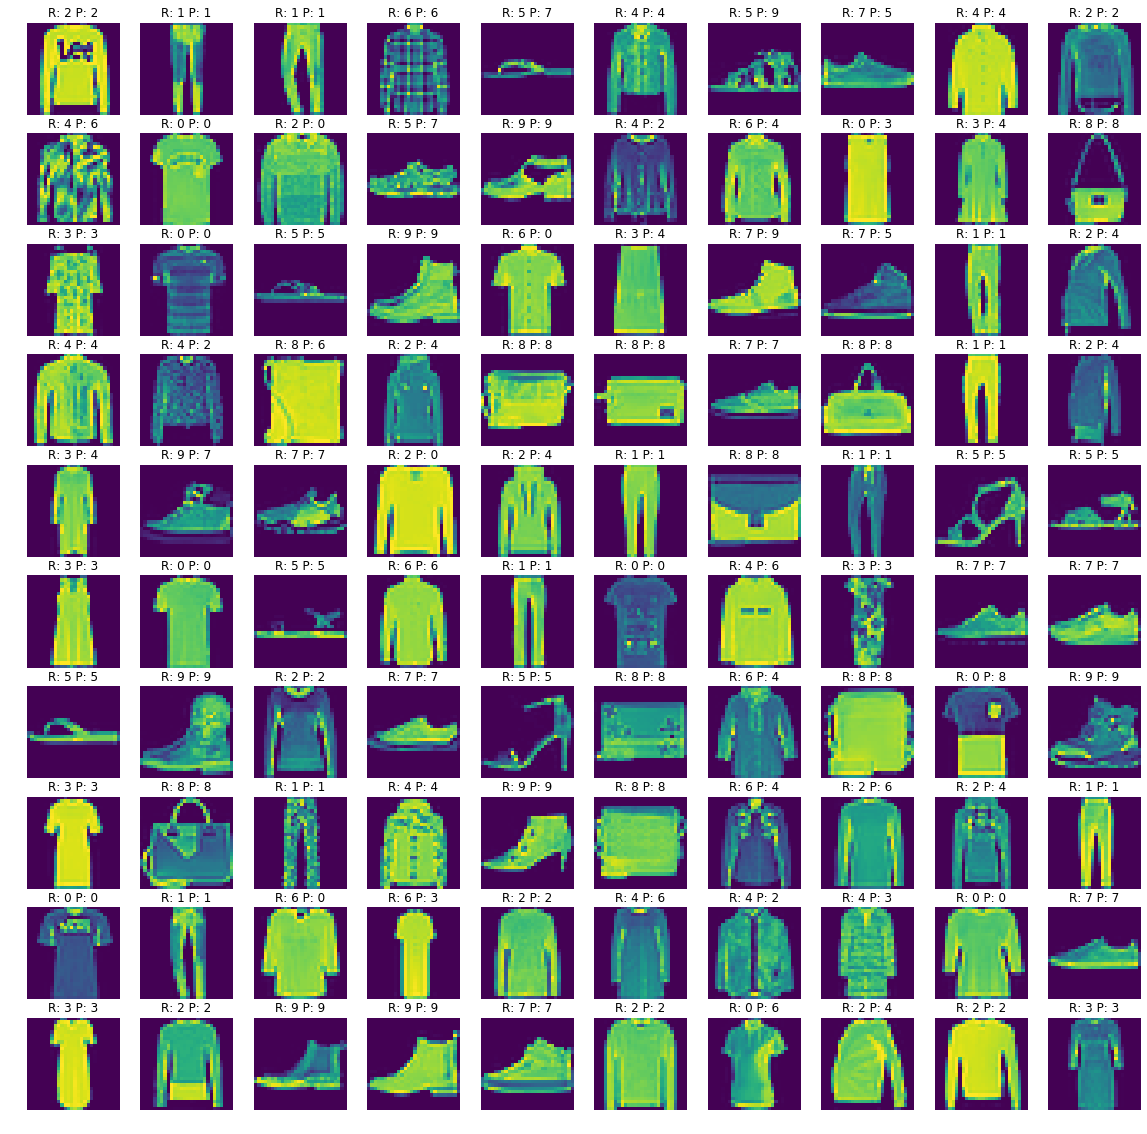

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt



plt_row = 10
plt_col = 10

plt.rcParams["figure.figsize"] = (20,20)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):

    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        i += 1
      # continue
    
    sub_plt=axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(te_image[i].reshape(28, 28))
    sub_plt_title = 'R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()